## Linear Regresssion

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('healthdata.csv')


In [18]:
# Feature Engineering Improvements

# 1. Create age groups for better analysis
data['age_squared'] = data['age'] ** 2  # Non-linear age effect
data['bmi_squared'] = data['bmi'] ** 2  # Non-linear BMI effect

# 2. Create interaction features
data['age_bmi'] = data['age'] * data['bmi']  # Interaction between age and BMI
data['smoker_bmi'] = data['smoker'].map({'yes': 1, 'no': 0}) * data['bmi']  # Smoking and BMI interaction


data.head()


,age,sex,bmi,children,smoker,region,charges,age_squared,bmi_squared,age_bmi,smoker_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,361,778.410000,530.100,27.9
1,18,male,33.770,1,no,southeast,1725.55230,324,1140.412900,607.860,0.0
2,28,male,33.000,3,no,southeast,4449.46200,784,1089.000000,924.000,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1089,515.517025,749.265,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1024,834.054400,924.160,0.0


In [19]:
# Define features and target variable
X = data.drop(['charges'], axis=1)
y = data['charges']

numeric_features = ['age', 'bmi', 'children', 'age_squared', 'bmi_squared', 'age_bmi', 'smoker_bmi']
categorical_features = ['sex', 'smoker', 'region']


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Apply preprocessing to features
X_processed = preprocessor.fit_transform(X)


In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (1070, 12)
Testing set size: (268, 12)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ -1127.76678152   3156.95393034    743.90598017   4192.84191712
  -3478.24930867    779.74856996  18656.52052451   -521.84809774
 -21081.82698313   -715.82376858   -898.53324175  -1233.48840627]
Model Intercept: 18627.973997377216


In [22]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate performance using R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.3f}")
print(f"RMSE: ${rmse:,.2f}")

R² Score: 0.870
RMSE: $4,499.29


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


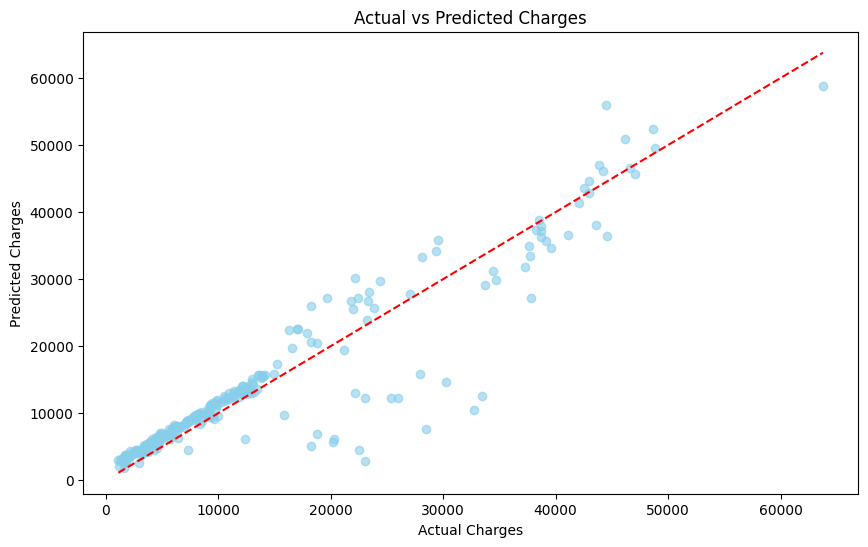

In [23]:
# Plot actual vs predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line (y=x)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

In [24]:
import joblib
joblib.dump(model, 'insurance_model.pkl')
joblib.dump(preprocessor, 'insurance_preprocessor.pkl')

['insurance_preprocessor.pkl']